Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Device: cuda
Dataset path exists: True
Classes in folder tree: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of images: 2527
Train size: 2022, Val size: 505
cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images
[Epoch 1/5] Train Loss: 0.6734 Acc: 0.7666 | Val Loss: 0.3681 Acc: 0.8832 | Time: 16.6s
  -> best model updated
[Epoch 2/5] Train Loss: 0.1579 Acc: 0.9644 | Val Loss: 0.2634 Acc: 0.9149 | Time: 16.9s
  -> best model updated
[Epoch 3/5] Train Loss: 0.0507 Acc: 0.9916 | Val Loss: 0.2470 Acc: 0.9109 | Time: 16.8s
[Epoch 4/5] Train Loss: 0.0369 Acc: 0.9951 | Val Loss: 0.2323 Acc: 0.9188 | Time: 18.9s
  -> best model updated
[Epoch 5/5] Train Loss: 0.0220 Acc: 0.9975 | Val Loss: 0.2544 Acc: 0.9089 | Time: 17

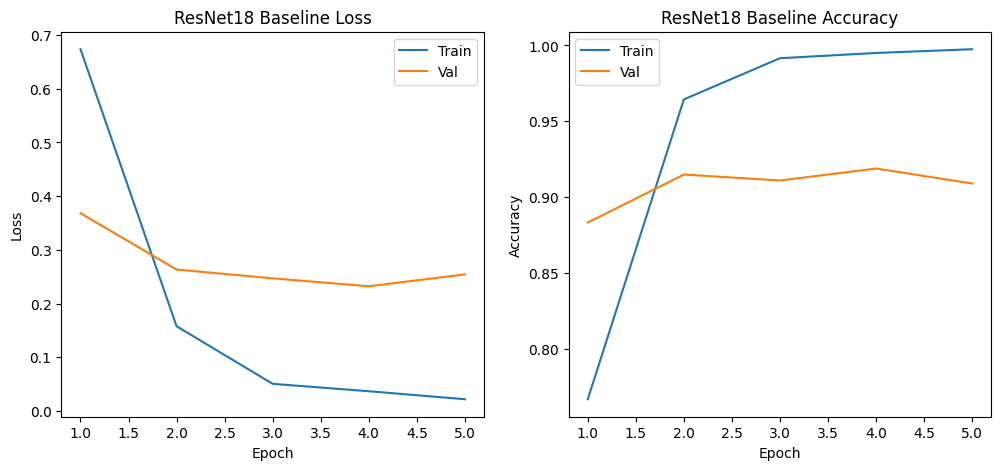

Best Val Accuracy (ResNet18): 0.9188118811881189
Classification report (ResNet18):
              precision    recall  f1-score   support

   cardboard     0.9863    0.9474    0.9664        76
       glass     0.8761    0.9429    0.9083       105
       metal     0.9294    0.9186    0.9240        86
       paper     0.9174    0.9569    0.9367       116
     plastic     0.9036    0.8427    0.8721        89
       trash     0.9333    0.8485    0.8889        33

    accuracy                         0.9188       505
   macro avg     0.9244    0.9095    0.9161       505
weighted avg     0.9198    0.9188    0.9186       505



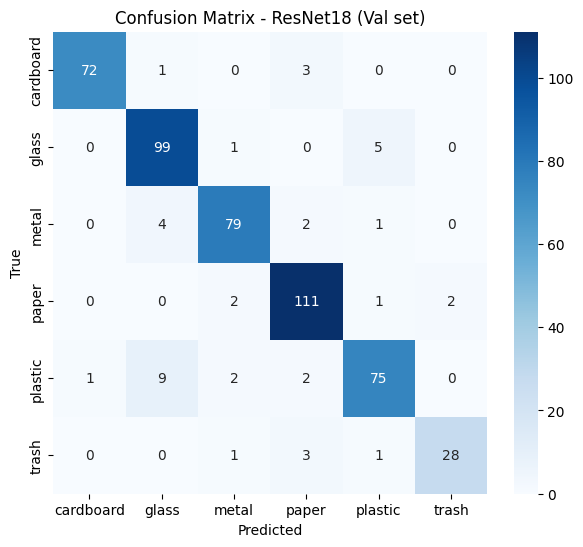

Class counts: [403 501 410 594 482 137]
Class weights: tensor([0.8283, 0.6663, 0.8142, 0.5620, 0.6926, 2.4366])
[Epoch 1/5] Train Loss: 0.7625 Acc: 0.7319 | Val Loss: 0.3728 Acc: 0.8812
[Epoch 2/5] Train Loss: 0.1611 Acc: 0.9575 | Val Loss: 0.2947 Acc: 0.9050
[Epoch 3/5] Train Loss: 0.0563 Acc: 0.9911 | Val Loss: 0.2436 Acc: 0.9168
[Epoch 4/5] Train Loss: 0.0322 Acc: 0.9955 | Val Loss: 0.2503 Acc: 0.9129
[Epoch 5/5] Train Loss: 0.0387 Acc: 0.9946 | Val Loss: 0.2583 Acc: 0.9228


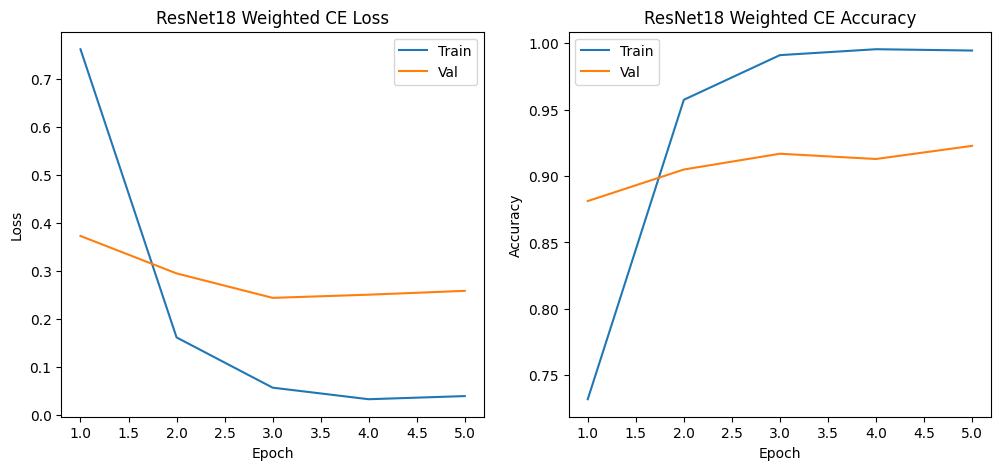

Val Accuracy (Weighted): 0.9227722772277228
              precision    recall  f1-score   support

   cardboard     0.9730    0.9474    0.9600        76
       glass     0.9245    0.9333    0.9289       105
       metal     0.8421    0.9302    0.8840        86
       paper     0.9565    0.9483    0.9524       116
     plastic     0.9512    0.8764    0.9123        89
       trash     0.8485    0.8485    0.8485        33

    accuracy                         0.9228       505
   macro avg     0.9160    0.9140    0.9143       505
weighted avg     0.9249    0.9228    0.9231       505

Trash metrics (baseline): {'precision': 0.9333333333333333, 'recall': 0.8484848484848485, 'f1-score': 0.8888888888888888, 'support': 33.0}
Trash metrics (weighted): {'precision': 0.8484848484848485, 'recall': 0.8484848484848485, 'f1-score': 0.8484848484848485, 'support': 33.0}
[Epoch 1/5] Train Loss: 0.6978 Acc: 0.7572 | Val Loss: 0.3960 Acc: 0.8634 | Time: 17.5s
  -> best model updated
[Epoch 2/5] Train Loss:

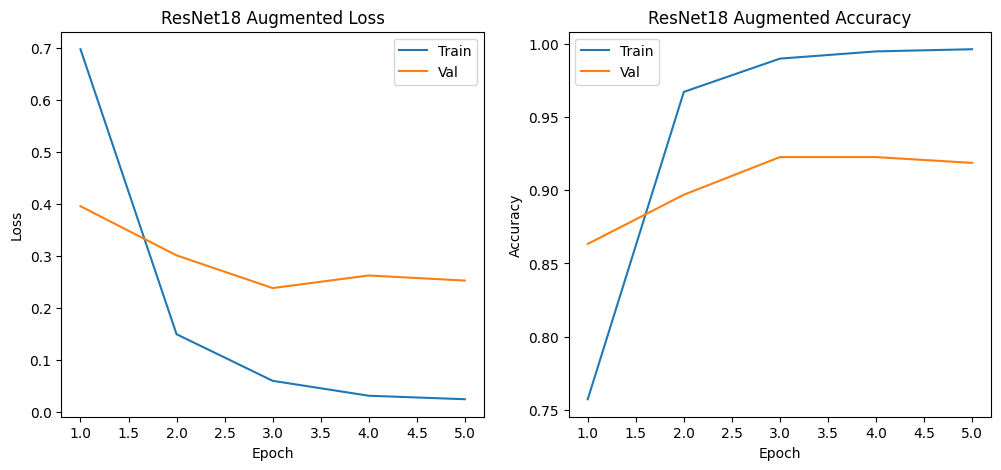

Val Accuracy (Augmented): 0.9188118811881189
              precision    recall  f1-score   support

   cardboard     0.9444    0.9855    0.9645        69
       glass     0.8765    0.8659    0.8712        82
       metal     0.9043    0.9659    0.9341        88
       paper     0.9624    0.9481    0.9552       135
     plastic     0.9175    0.8900    0.9036       100
       trash     0.8214    0.7419    0.7797        31

    accuracy                         0.9188       505
   macro avg     0.9044    0.8996    0.9014       505
weighted avg     0.9183    0.9188    0.9182       505

Benchmarking resnet18 ...
{'model': 'resnet18', 'val_acc': 0.9128712871287129, 'val_loss': 0.25507826312343673, 'train_time_s': 41.612165451049805, 'model_size_mb': 42.72291088104248}
Benchmarking mobilenet_v2 ...
{'model': 'mobilenet_v2', 'val_acc': 0.8811881188118812, 'val_loss': 0.3853763271676432, 'train_time_s': 43.34471273422241, 'model_size_mb': 8.74878978729248}
Benchmarking densenet121 ...
{'model': 

In [24]:
# ============================================
# Pattern Recognition Project – Part 2
# Project Title: Intelligent Waste Sorting Expert System
# Group: WS-PR2

# Student 1 (Technical Lead): Ashim Batyr
# Student 2 (Figures & Slides): Jorge Adrian Torres
# Student 3 (Report): Samuel Josino de Souza

# Dataset: TrashNet
# Framework: PyTorch
# Environment: Google Colab (GPU preferred)
# ============================================

!pip install -q torch torchvision scikit-learn matplotlib seaborn opencv-python

# =========================
# 0. SETUP & DATA LOADING
# =========================
from google.colab import drive
drive.mount('/content/drive')

import os
import random
import numpy as np
import time
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset

from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ---- device setup ----
# This block automatically uses GPU in Colab if available.
use_cuda = torch.cuda.is_available()
DEVICE = torch.device("cuda" if use_cuda else "cpu")
print("Device:", DEVICE)

# DataLoader performance flags depend on device:
# - On GPU: pin_memory=True and a few workers speed up training.
# - On CPU: pin_memory=False and num_workers=0 are usually safer.
pin_memory = True if use_cuda else False
num_workers = 2 if use_cuda else 0

# ---- paths ----
# Make sure this path points to the TrashNet dataset on your Google Drive.
DATA_DIR = "/content/drive/MyDrive/dataset-resized"  # change if needed

print("Dataset path exists:", os.path.exists(DATA_DIR))
print("Classes in folder tree:", os.listdir(DATA_DIR))

# ---- reproducibility ----
def set_seed(seed=42):
    # Fix random seeds for Python, NumPy and PyTorch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# =========================
# 1. TRANSFORMS & DATASETS
# =========================

# Basic preprocessing for the baseline (RQ1).
# We resize images to 224x224 and normalize using ImageNet statistics.
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Validation/test transform: no augmentation, only resize + normalize.
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

full_dataset = datasets.ImageFolder(DATA_DIR, transform=train_transform)
class_names = full_dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of images:", len(full_dataset))

# Train/validation split (e.g., 80/20 split).
val_ratio = 0.2
val_size = int(len(full_dataset) * val_ratio)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Assign the test transform to the validation subset.
val_dataset.dataset.transform = test_transform

BATCH_SIZE = 32

# Data loaders with device-aware settings.
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=pin_memory
)

print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}")

# Compute per-class image counts for RQ1/RQ2 tables (dataset overview).
labels_all = [label for _, label in full_dataset]
class_counts = np.bincount(labels_all)
for cls, cnt in zip(class_names, class_counts):
    print(f"{cls}: {cnt} images")

df_classes = pd.DataFrame({"class": class_names, "count": class_counts})
df_classes.to_excel("RQ1_dataset_per_class.xlsx", index=False)

# =========================
# 2. MODEL DEFINITIONS
#    (Baseline + alternatives)
# =========================

def create_model(model_name="resnet18", pretrained=True, num_classes=6):
    """
    Create a CNN model with an adjustable classifier head.
    Uses torchvision pretrained weights for faster convergence.
    """
    if model_name == "resnet18":
        model = models.resnet18(
            weights=models.ResNet18_Weights.DEFAULT if pretrained else None
        )
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
    elif model_name == "mobilenet_v2":
        model = models.mobilenet_v2(
            weights=models.MobileNet_V2_Weights.DEFAULT if pretrained else None
        )
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, num_classes)
    elif model_name == "densenet121":
        model = models.densenet121(
            weights=models.DenseNet121_Weights.DEFAULT if pretrained else None
        )
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)
    else:
        raise ValueError("Unknown model_name")
    return model.to(DEVICE)

# =========================
# 3. TRAIN / EVAL UTILITIES
# =========================

criterion = nn.CrossEntropyLoss()

def train_one_epoch(model, loader, optimizer):
    """
    Standard training loop for one epoch:
    forward pass, loss computation, backpropagation, optimizer step.
    """
    model.train()
    running_loss = 0.0
    running_correct = 0

    for images, labels in loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        running_correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_correct / len(loader.dataset)
    return epoch_loss, epoch_acc

def evaluate(model, loader):
    """
    Evaluation loop:
    computes loss, accuracy, and stores predictions and labels
    for later metrics (classification report, confusion matrix).
    """
    model.eval()
    running_loss = 0.0
    running_correct = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            running_correct += (preds == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_correct / len(loader.dataset)
    return epoch_loss, epoch_acc, np.array(all_labels), np.array(all_preds)

def train_model(model, train_loader, val_loader, epochs=5, lr=1e-4):
    """
    High-level training manager:
    - trains the model for N epochs
    - evaluates on validation set
    - tracks history for plotting
    - saves the best model checkpoint based on validation accuracy.
    """
    optimizer = optim.Adam(model.parameters(), lr=lr)
    best_val_acc = 0.0
    history = {"train_loss": [], "train_acc": [],
               "val_loss": [], "val_acc": []}

    for epoch in range(1, epochs + 1):
        t0 = time.time()
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
        val_loss, val_acc, y_true, y_pred = evaluate(model, val_loader)
        dt = time.time() - t0

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"[Epoch {epoch}/{epochs}] "
              f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} | "
              f"Time: {dt:.1f}s")

        # Save the best model based on validation accuracy.
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pt")
            print("  -> best model updated")

    return history

def plot_history(history, title_prefix=""):
    """
    Plot training and validation loss/accuracy curves.
    Useful for RQ1–RQ3 figures in the report.
    """
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label="Train")
    plt.plot(epochs, history["val_loss"], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_acc"], label="Train")
    plt.plot(epochs, history["val_acc"], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} Accuracy")
    plt.legend()

    plt.show()



# =========================
# RQ1: Baseline performance
# =========================
# RQ1 (proposal):
# "How accurately can a deep learning model classify waste images
#  from the TrashNet dataset into six material categories?"
#
# This section trains a ResNet18 baseline on TrashNet using a standard
# preprocessing pipeline. We report:
# - dataset statistics and class distribution (Tables 1.1 / 1.2),
# - global performance metrics (Table 1.4),
# - per-class metrics and confusion matrix (Table 1.5).

baseline_model = create_model("resnet18", pretrained=True, num_classes=num_classes)

# For debugging on CPU you may reduce epochs to 3–5.
history_baseline = train_model(
    baseline_model,
    train_loader,
    val_loader,
    epochs=5, #reduced from 10
    lr=1e-4
)
plot_history(history_baseline, title_prefix="ResNet18 Baseline")

# Load best model checkpoint and evaluate on the validation set.
baseline_model.load_state_dict(torch.load("best_model.pt", map_location=DEVICE))
val_loss, val_acc, y_true, y_pred = evaluate(baseline_model, val_loader)
print("Best Val Accuracy (ResNet18):", val_acc)

print("Classification report (ResNet18):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Export per-class metrics for RQ1 tables.
report_baseline = classification_report(
    y_true, y_pred, target_names=class_names, output_dict=True, digits=4
)
df_rq1_per_class = pd.DataFrame(report_baseline).transpose()
df_rq1_per_class.to_excel("RQ1_per_class_metrics.xlsx")

# Confusion matrix for RQ1 figures.
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet18 (Val set)")
plt.show()

# =========================
# RQ2: Class imbalance
# =========================
# RQ2 (proposal):
# "How does class imbalance in the TrashNet dataset affect classification
#  performance, and which techniques best mitigate this problem?"
#
# Here we:
# - quantify class imbalance (Table 2.1),
# - compare baseline vs. weighted loss per class (Table 2.2 / 2.3),
# - focus on the minority 'trash' class (Tables 2.4 / 2.5).

print("Class counts:", class_counts)

# Compute class weights as 1/frequency (normalized).
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
class_weights = class_weights / class_weights.sum() * len(class_weights)
print("Class weights:", class_weights)

criterion_weighted = nn.CrossEntropyLoss(weight=class_weights.to(DEVICE))

def train_one_epoch_weighted(model, loader, optimizer):
    """
    Training loop that uses a weighted loss to handle class imbalance.
    """
    model.train()
    running_loss = 0.0
    running_correct = 0

    for images, labels in loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion_weighted(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        running_correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_correct / len(loader.dataset)
    return epoch_loss, epoch_acc

def train_model_weighted(model, train_loader, val_loader, epochs=5, lr=1e-4):
    """
    High-level training manager for the weighted loss variant (RQ2).
    """
    optimizer = optim.Adam(model.parameters(), lr=lr)
    history = {"train_loss": [], "train_acc": [],
               "val_loss": [], "val_acc": []}

    for epoch in range(1, epochs + 1):
        train_loss, train_acc = train_one_epoch_weighted(model, train_loader, optimizer)
        val_loss, val_acc, y_true_tmp, y_pred_tmp = evaluate(model, val_loader)

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"[Epoch {epoch}/{epochs}] "
              f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    return history

weighted_model = create_model("resnet18", pretrained=True, num_classes=num_classes)
history_weighted = train_model_weighted(
    weighted_model,
    train_loader,
    val_loader,
    epochs=5,
    lr=1e-4
)
plot_history(history_weighted, title_prefix="ResNet18 Weighted CE")

val_loss_w, val_acc_w, y_true_w, y_pred_w = evaluate(weighted_model, val_loader)
print("Val Accuracy (Weighted):", val_acc_w)
print(classification_report(y_true_w, y_pred_w, target_names=class_names, digits=4))

# Per-class metrics for baseline vs weighted (for RQ2 tables).
report_w = classification_report(
    y_true_w, y_pred_w, target_names=class_names, output_dict=True, digits=4
)
df_rq2_baseline = pd.DataFrame(report_baseline).transpose()
df_rq2_weighted = pd.DataFrame(report_w).transpose()

df_rq2_baseline.to_excel("RQ2_baseline_per_class.xlsx")
df_rq2_weighted.to_excel("RQ2_weighted_per_class.xlsx")

# Focus on 'trash' class metrics (minority class).
trash_metrics_baseline = report_baseline["trash"]
trash_metrics_weighted = report_w["trash"]
print("Trash metrics (baseline):", trash_metrics_baseline)
print("Trash metrics (weighted):", trash_metrics_weighted)

# =========================
# RQ3: Preprocessing & augmentation
# =========================
# RQ3 (proposal):
# "What is the impact of different data preprocessing and augmentation
#  strategies on the robustness and generalization of the waste
#  classification model?"
#
# We compare:
# - the baseline preprocessing (RQ1) vs.
# - an augmented pipeline with random crops, flips, and color jitter.

aug_train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2,
                           saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

aug_dataset = datasets.ImageFolder(DATA_DIR, transform=aug_train_transform)
aug_train_dataset, aug_val_dataset = random_split(aug_dataset, [train_size, val_size])
aug_val_dataset.dataset.transform = test_transform

aug_train_loader = DataLoader(
    aug_train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)
aug_val_loader = DataLoader(
    aug_val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=pin_memory
)

aug_model = create_model("resnet18", pretrained=True, num_classes=num_classes)
history_aug = train_model(
    aug_model,
    aug_train_loader,
    aug_val_loader,
    epochs=5,
    lr=1e-4
)
plot_history(history_aug, title_prefix="ResNet18 Augmented")

val_loss_aug, val_acc_aug, y_true_aug, y_pred_aug = evaluate(aug_model, aug_val_loader)
print("Val Accuracy (Augmented):", val_acc_aug)
print(classification_report(y_true_aug, y_pred_aug, target_names=class_names, digits=4))

# Export metrics for RQ3 tables (clean vs augmented pipeline).
report_aug = classification_report(
    y_true_aug, y_pred_aug, target_names=class_names, output_dict=True, digits=4
)
df_rq3_aug = pd.DataFrame(report_aug).transpose()
df_rq3_aug.to_excel("RQ3_augmented_per_class.xlsx")


# =========================
# RQ4: Architecture vs efficiency
# =========================
# RQ4 (proposal):
# "How does the choice of model architecture and hyperparameters influence
#  the trade-off between accuracy and computational efficiency for an
#  intelligent waste sorting system?"
#
# We benchmark several architectures and measure:
# - validation accuracy and loss,
# - training time,
# - model size on disk.
# Results go to RQ4 tables and figures.

def benchmark_model(model_name, epochs=3, lr=1e-4):
    """
    Train a given architecture for a few epochs and measure:
    - validation accuracy/loss
    - total training time
    - final model size on disk
    This supports RQ4 trade-off analysis between accuracy and efficiency.
    """
    model = create_model(model_name, pretrained=True, num_classes=num_classes)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    start_time = time.time()
    for epoch in range(epochs):
        train_one_epoch(model, train_loader, optimizer)
    train_time = time.time() - start_time

    val_loss_m, val_acc_m, _, _ = evaluate(model, val_loader)

    # Compute model size in MB by saving temporary checkpoint.
    tmp_path = f"{model_name}_tmp.pt"
    torch.save(model.state_dict(), tmp_path)
    model_size_mb = os.path.getsize(tmp_path) / (1024 * 1024)
    os.remove(tmp_path)

    return {
        "model": model_name,
        "val_acc": val_acc_m,
        "val_loss": val_loss_m,
        "train_time_s": train_time,
        "model_size_mb": model_size_mb,
    }

results_arch = []
for name in ["resnet18", "mobilenet_v2", "densenet121"]:
    print(f"Benchmarking {name} ...")
    res = benchmark_model(name, epochs=3, lr=1e-4)
    print(res)
    results_arch.append(res)

df_arch = pd.DataFrame(results_arch)
print(df_arch)

df_rank = df_arch.copy()

# Efficiency score: higher accuracy and smaller model size is better
df_rank["efficiency_score"] = (
    df_rank["val_acc"] / df_rank["model_size_mb"]
)

# Sort models by efficiency score (descending = best first)
df_rank = df_rank.sort_values(
    by="efficiency_score",
    ascending=False
).reset_index(drop=True)

# Add explicit ranking index
df_rank.insert(0, "rank", df_rank.index + 1)

# Hyperparameter table for RQ4.
rq4_hparams = pd.DataFrame([
    {"model": "resnet18", "epochs": 3, "batch_size": BATCH_SIZE, "lr": 1e-4},
    {"model": "mobilenet_v2", "epochs": 3, "batch_size": BATCH_SIZE, "lr": 1e-4},
    {"model": "densenet121", "epochs": 3, "batch_size": BATCH_SIZE, "lr": 1e-4},
])
rq4_hparams.to_excel("RQ4_hyperparameters.xlsx", index=False)

# Save RQ4 results to Excel for tables in the report.
df_arch.to_excel("RQ4_architecture_tradeoff.xlsx", index=False)


# =========================
# RQ5: Hybrid expert system (ML + rules)
# =========================
# RQ5 (proposal):
# "How can the trained classification model be integrated into an expert
#  system to support decision-making in real-world recycling workflows?"
#
# We build a simple rule-based layer on top of the model:
# - high-confidence predictions => AUTO_ROUTE_<CLASS>
# - medium-confidence predictions => RULE_ASSISTED_<CLASS>
# - low-confidence predictions => MANUAL_REVIEW
# and compute an action-level accuracy metric.

SOFTMAX = nn.Softmax(dim=1)

def hybrid_decision(logits, threshold_low=0.6, threshold_high=0.85):
    """
    Convert model logits to actions for the expert system:
    - AUTO_ROUTE_<CLASS>
    - RULE_ASSISTED_<CLASS>
    - MANUAL_REVIEW
    This simulates how the model would be integrated into a real system.
    """
    probs = SOFTMAX(logits)
    conf, pred = probs.max(dim=1)
    actions = []

    for c, p in zip(conf.cpu().numpy(), pred.cpu().numpy()):
        class_name = class_names[p]

        if c >= threshold_high:
            action = f"AUTO_ROUTE_{class_name.upper()}"
        elif c >= threshold_low:
            action = f"RULE_ASSISTED_{class_name.upper()}"
        else:
            action = "MANUAL_REVIEW"

        actions.append(action)

    return actions, conf.cpu().numpy(), pred.cpu().numpy()

# Demonstration of the hybrid layer on the validation set.
baseline_model.eval()
all_actions = []
all_conf = []
all_pred = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(DEVICE)
        logits = baseline_model(images)
        actions, conf, preds = hybrid_decision(logits)

        all_actions.extend(actions)
        all_conf.extend(conf)
        all_pred.extend(preds)
        all_labels.extend(labels.numpy())

def action_correct(action, true_class_idx):
    """
    A simple mapping from actions to correctness:
    an action is considered correct if it contains the true class name.
    """
    cls_name = class_names[true_class_idx].upper()
    return cls_name in action

correct_actions = [
    action_correct(a, t) for a, t in zip(all_actions, all_labels)
]
action_acc = np.mean(correct_actions)
print("Action-level accuracy (hybrid):", action_acc)

# Export action statistics for RQ5 tables.
from collections import Counter
action_counts = Counter(all_actions)
print("Action counts:", action_counts)

df_actions = pd.DataFrame(
    [{"action": k, "count": v} for k, v in action_counts.items()]
)
df_actions.to_excel("RQ5_actions_summary.xlsx", index=False)

# =========================
# 9. SAVE ARTIFACTS
# =========================

# Save metrics for external analysis and tables (e.g., in Excel).
np.savez("metrics_baseline_resnet18.npz",
         y_true=y_true,
         y_pred=y_pred)

np.savez("metrics_weighted_resnet18.npz",
         y_true=y_true_w,
         y_pred=y_pred_w)

print("Done.")



In [ ]:
# Saving Figures and Tables
BASE_OUT_DIR = "/content/drive/MyDrive/Figures_Tables"


def save_fig(fig, rq, idx):
    os.makedirs(f"{BASE_OUT_DIR}/{rq}", exist_ok=True)
    fig.savefig(f"{BASE_OUT_DIR}/{rq}/{rq}_Fig{idx}.pdf", bbox_inches="tight")
    plt.close(fig)

def save_tab(df, rq, idx):
    os.makedirs(f"{BASE_OUT_DIR}/{rq}", exist_ok=True)
    df.to_excel(f"{BASE_OUT_DIR}/{rq}/{rq}_Tab{idx}.xlsx", index=False)

In [ ]:
# ============================================================
# RQ1_Fig1 — Training Curves (Loss & Accuracy)
# Purpose:
# Visualize model convergence and detect overfitting or underfitting
# by comparing training and validation loss and accuracy over epochs.
# ============================================================

fig = plt.figure(figsize=(12,5))
epochs = range(1, len(history_baseline["train_loss"]) + 1)

plt.subplot(1,2,1)
plt.plot(epochs, history_baseline["train_loss"], label="Train")
plt.plot(epochs, history_baseline["val_loss"], label="Val")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(epochs, history_baseline["train_acc"], label="Train")
plt.plot(epochs, history_baseline["val_acc"], label="Val")
plt.legend()
plt.title("Accuracy")

save_fig(fig, "RQ1", 1)


# ============================================================
# RQ1_Fig2 — Confusion Matrix (ResNet18 Baseline)
# Purpose:
# Show how predictions are distributed across classes and identify
# systematic confusions between waste categories.
# ============================================================

fig = plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix – ResNet18")

save_fig(fig, "RQ1", 2)


# ============================================================
# RQ1_Tab1 — Dataset Overview
# Purpose:
# Summarize the number of images per waste class in the TrashNet dataset,
# providing context for class balance and dataset composition.
# ============================================================

save_tab(df_classes, "RQ1", 1)


# ============================================================
# RQ1_Tab2 — Per-Class Metrics (Baseline Model)
# Purpose:
# Report precision, recall, F1-score, and support for each class,
# enabling fine-grained performance analysis.
# ============================================================

save_tab(df_rq1_per_class.reset_index(), "RQ1", 2)


# ============================================================
# RQ1_Tab3 — Global Performance Metrics
# Purpose:
# Provide aggregate performance indicators (accuracy and macro-averaged
# precision, recall, and F1-score) for the baseline model.
# ============================================================

df_rq1_global = pd.DataFrame([{
    "Accuracy": val_acc,
    "Macro Precision": df_rq1_per_class.loc["macro avg", "precision"],
    "Macro Recall": df_rq1_per_class.loc["macro avg", "recall"],
    "Macro F1-score": df_rq1_per_class.loc["macro avg", "f1-score"]
}])

save_tab(df_rq1_global, "RQ1", 3)




In [27]:
# ============================================================
# RQ5_Fig1 — Cumulative Action Distribution
# Purpose:
# Visualize how expert system decisions accumulate across action
# types, highlighting dominance of automatic vs manual routing.
# ============================================================

df_actions_sorted = df_actions.sort_values("count", ascending=False)
df_actions_sorted["cumulative"] = (
    df_actions_sorted["count"].cumsum() / df_actions_sorted["count"].sum()
)

fig = plt.figure(figsize=(7,5))

plt.plot(df_actions_sorted["action"],
         df_actions_sorted["cumulative"],
         marker="o")

plt.ylabel("Cumulative Proportion")
plt.xlabel("Action Type")
plt.title("Cumulative Distribution of Expert System Actions")
plt.grid(alpha=0.3)

save_fig(fig, "RQ5", 1)




# ============================================================
# RQ5_Fig2 — Sorted Confidence Curve
# Purpose:
# Analyze prediction confidence behavior by visualizing sorted
# confidence scores across validation samples.
# ============================================================

conf_sorted = np.sort(all_conf)

fig = plt.figure(figsize=(7,5))

plt.plot(conf_sorted)
plt.axhline(0.85, linestyle="--", label="High confidence threshold")
plt.axhline(0.60, linestyle="--", label="Low confidence threshold")

plt.ylabel("Confidence Score")
plt.xlabel("Validation Samples (sorted)")
plt.title("Prediction Confidence Curve")
plt.legend()
plt.grid(alpha=0.3)

save_fig(fig, "RQ5", 2)



# ============================================================
# RQ2_Tab1 — Class Distribution and Weights
# Purpose:
# Summarize the number of samples per class and the corresponding
# weights used in the weighted cross-entropy loss.
# ============================================================

df_dist = pd.DataFrame({
    "Class": class_names,
    "Samples": class_counts,
    "Weight": class_weights.cpu().numpy()
})

save_tab(df_dist, "RQ2", 1)


# ============================================================
# RQ2_Tab2 — Per-Class Metrics Comparison
# Purpose:
# Compare per-class precision, recall, and F1-score between the baseline
# model and the weighted-loss model.
# ============================================================

save_tab(df_rq2_weighted.reset_index(), "RQ2", 2)

# ============================================================
# RQ2_Tab3 — Trash Class Performance Comparison
# Purpose:
# Compare precision, recall, F1-score, and support for the
# underrepresented 'trash' class before and after class weighting.
# ============================================================

df_trash = pd.DataFrame([
    {"Model": "Baseline", **trash_metrics_baseline},
    {"Model": "Weighted CE", **trash_metrics_weighted}
])

save_tab(df_trash, "RQ2", 3)




In [ ]:
# ============================================================
# RQ3_Fig1 — Baseline vs Augmented Accuracy Curves
# Purpose:
# Compare validation accuracy across epochs to assess the effect of
# data augmentation on model generalization.
# ============================================================

fig = plt.figure()
plt.plot(history_baseline["val_acc"], label="Baseline")
plt.plot(history_aug["val_acc"], label="Augmented")
plt.legend()
plt.title("Effect of Data Augmentation")

save_fig(fig, "RQ3", 1)



# ============================================================
# RQ3_Fig2 — Augmented Image Samples (Denormalized)
# Purpose:
# Visualize examples of augmented training images after reversing
# normalization to ensure correct color representation.
# ============================================================
def denormalize(img_tensor, mean, std):
    """
    Reverse ImageNet normalization for visualization.
    Input: tensor (C, H, W)
    Output: numpy array (H, W, C) in [0,1]
    """
    img = img_tensor.clone().cpu()
    for c in range(3):
        img[c] = img[c] * std[c] + mean[c]
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    return img


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

fig = plt.figure(figsize=(10,4))
for i in range(5):
    img, _ = aug_train_dataset[i]
    img_vis = denormalize(img, mean, std)
    plt.subplot(1,5,i+1)
    plt.imshow(img_vis)
    plt.axis("off")

save_fig(fig, "RQ3", 2)



# ============================================================
# RQ3_Tab1 — Preprocessing Pipelines
# Purpose:
# Describe the preprocessing and data augmentation configurations
# used in the baseline and augmented training pipelines.
# ============================================================

df_rq3_pipeline = pd.DataFrame([
    {
        "Pipeline": "Baseline",
        "Resize": "224×224",
        "Augmentation": "None",
        "Normalization": "ImageNet mean/std"
    },
    {
        "Pipeline": "Augmented",
        "Resize": "256→224",
        "Augmentation": "RandomCrop, Flip, ColorJitter",
        "Normalization": "ImageNet mean/std"
    }
])

save_tab(df_rq3_pipeline, "RQ3", 1)


# ============================================================
# RQ3_Tab2 — Per-Class Metrics (Augmented Model)
# Purpose:
# Report detailed class-level performance for the model trained
# with data augmentation.
# ============================================================

save_tab(df_rq3_aug.reset_index(), "RQ3", 2)


# ============================================================
# RQ3_Tab3 — Robustness Summary
# Purpose:
# Summarize robustness improvements by comparing validation accuracy
# between baseline and augmented training pipelines. The accuracy gain
# is used as a proxy for improved generalization and robustness.
# ============================================================

df_robust = pd.DataFrame([
    {
        "Pipeline": "Baseline",
        "Validation Accuracy": val_acc,
        "Robustness Gain vs Baseline": 0.0
    },
    {
        "Pipeline": "Augmented",
        "Validation Accuracy": val_acc_aug,
        "Robustness Gain vs Baseline": val_acc_aug - val_acc
    }
])

save_tab(df_robust, "RQ3", 3)


In [26]:
# ============================================================
# RQ4_Fig1 — Normalized Architecture Comparison
# Purpose:
# Compare model architectures across normalized accuracy,
# model size, and training time to highlight efficiency trade-offs.
# ============================================================

df_norm = df_arch.copy()

# Normalize metrics to [0,1]
df_norm["val_acc_norm"] = (
    df_norm["val_acc"] - df_norm["val_acc"].min()
) / (df_norm["val_acc"].max() - df_norm["val_acc"].min())

df_norm["model_size_norm"] = (
    df_norm["model_size_mb"] - df_norm["model_size_mb"].min()
) / (df_norm["model_size_mb"].max() - df_norm["model_size_mb"].min())

df_norm["train_time_norm"] = (
    df_norm["train_time_s"] - df_norm["train_time_s"].min()
) / (df_norm["train_time_s"].max() - df_norm["train_time_s"].min())

fig = plt.figure(figsize=(8,5))

plt.plot(df_norm["model"], df_norm["val_acc_norm"],
         marker="o", label="Accuracy (normalized)")
plt.plot(df_norm["model"], 1 - df_norm["model_size_norm"],
         marker="o", label="Compactness (1 − size)")
plt.plot(df_norm["model"], 1 - df_norm["train_time_norm"],
         marker="o", label="Training Efficiency (1 − time)")

plt.ylabel("Normalized Score")
plt.title("Normalized Architecture Efficiency Comparison")
plt.legend()
plt.grid(alpha=0.3)

save_fig(fig, "RQ4", 1)



# ============================================================
# RQ4_Fig2 — Architecture Efficiency Ranking
# Purpose:
# Rank model architectures based on a combined efficiency score
# that balances accuracy and model compactness.
# ============================================================

fig = plt.figure(figsize=(7,4))

sns.barplot(
    x="efficiency_score",
    y="model",
    data=df_rank,
    orient="h"
)

plt.xlabel("Efficiency Score (Accuracy / Model Size)")
plt.ylabel("Model")
plt.title("Overall Architecture Efficiency Ranking")

save_fig(fig, "RQ4", 2)



# ============================================================
# RQ4_Tab1 — Hyperparameter Settings
# Purpose:
# Document training hyperparameters used for each architecture,
# ensuring experimental reproducibility.
# ============================================================

save_tab(rq4_hparams, "RQ4", 1)


# ============================================================
# RQ4_Tab2 — Architecture Trade-Off
# Purpose:
# Summarize accuracy, loss, training time, and model size for
# each evaluated architecture.
# ============================================================

save_tab(df_arch, "RQ4", 2)


# ============================================================
# RQ4_Tab3 — Efficiency Ranking
# Purpose:
# Rank model architectures using a simple efficiency score that
# balances validation accuracy and model size.
# ============================================================

df_rank = df_arch.copy()

# Simple efficiency score:
# higher accuracy and smaller model size → higher score
df_rank["efficiency_score"] = (
    df_rank["val_acc"] / df_rank["model_size_mb"]
)

# Rank models from best to worst
df_rank = df_rank.sort_values(
    by="efficiency_score",
    ascending=False
).reset_index(drop=True)


save_tab(df_rank, "RQ4", 3)


In [29]:
# ============================================================
# RQ5_Fig1 — Action Distribution (Horizontal Ranking)
# Purpose:
# Visualize the frequency of expert system actions using a
# horizontal bar chart for improved readability of action labels.
# ============================================================

df_actions_sorted = df_actions.sort_values("count", ascending=True)

fig = plt.figure(figsize=(8,5))

sns.barplot(
    x="count",
    y="action",
    data=df_actions_sorted,
    orient="h"
)

plt.xlabel("Number of Samples")
plt.ylabel("Action Type")
plt.title("Distribution of Expert System Actions")
plt.grid(axis="x", alpha=0.3)

save_fig(fig, "RQ5", 1)



# ============================================================
# RQ5_Fig2 — Sorted Confidence Curve (Improved Styling)
# Purpose:
# Analyze prediction confidence behavior across validation samples,
# highlighting decision thresholds used by the expert system.
# ============================================================

conf_sorted = np.sort(all_conf)

fig = plt.figure(figsize=(8,5))

plt.plot(conf_sorted, linewidth=2)
plt.axhline(0.85, linestyle="--", linewidth=1, label="High confidence threshold")
plt.axhline(0.60, linestyle="--", linewidth=1, label="Low confidence threshold")

plt.ylabel("Confidence Score")
plt.xlabel("Validation Samples (sorted)")
plt.title("Prediction Confidence Curve")
plt.legend()
plt.grid(alpha=0.3)

save_fig(fig, "RQ5", 2)


# ============================================================
# RQ5_Tab1 — Rule Base
# Purpose:
# Define the rule-based decision logic that maps model confidence
# and predicted class to final system actions.
# ============================================================

df_rules = pd.DataFrame([
    {
        "Condition": "Confidence ≥ 0.85",
        "Action": "AUTO_ROUTE_<CLASS>",
        "Description": "High-confidence prediction, automatic routing"
    },
    {
        "Condition": "0.60 ≤ Confidence < 0.85",
        "Action": "RULE_ASSISTED_<CLASS>",
        "Description": "Medium confidence, rule-assisted routing"
    },
    {
        "Condition": "Confidence < 0.60",
        "Action": "MANUAL_REVIEW",
        "Description": "Low confidence, human intervention required"
    }
])

save_tab(df_rules, "RQ5", 1)



# ============================================================
# RQ5_Tab2 — Action-Level Metrics
# Purpose:
# Report overall action-level accuracy achieved by the hybrid
# ML + rule-based expert system.
# ============================================================

df_action = pd.DataFrame([{
    "Action-Level Accuracy": action_acc,
    "Low Confidence Threshold": 0.60,
    "High Confidence Threshold": 0.85
}])

save_tab(df_action, "RQ5", 2)



# ============================================================
# RQ5_Tab3 — Action Summary
# Purpose:
# Summarize the frequency of each action type produced by the
# expert system during validation.
# ============================================================

save_tab(df_actions, "RQ5", 3)
